In [28]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../data/filtered_events_country_code.csv')
print(df.columns)

Index(['event_id_cnty', 'event_date', 'year', 'time_precision',
       'disorder_type', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'civilian_targeting', 'iso',
       'region', 'country', 'admin1', 'admin2', 'admin3', 'location',
       'latitude', 'longitude', 'geo_precision', 'source', 'source_scale',
       'notes', 'fatalities', 'tags', 'timestamp', 'population_best',
       'clean_notes', 'country_code'],
      dtype='object')


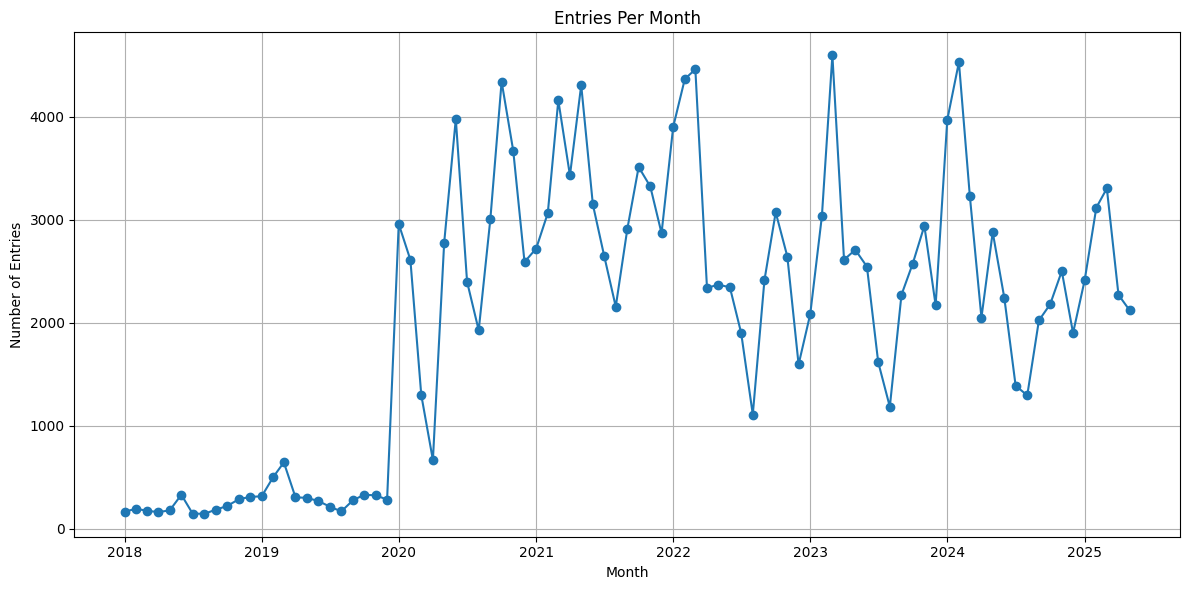

In [29]:
#protests over time
df['date'] = pd.to_datetime(df['event_date'], format='%d %B %Y')
df['year_month'] = df['date'].dt.to_period('M').dt.to_timestamp()

df_grouped = df.groupby('year_month').size().reset_index(name='count')

plt.figure(figsize=(12,6))
plt.plot(df_grouped['year_month'], df_grouped['count'], marker='o')
plt.title('Entries Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='year_month'>

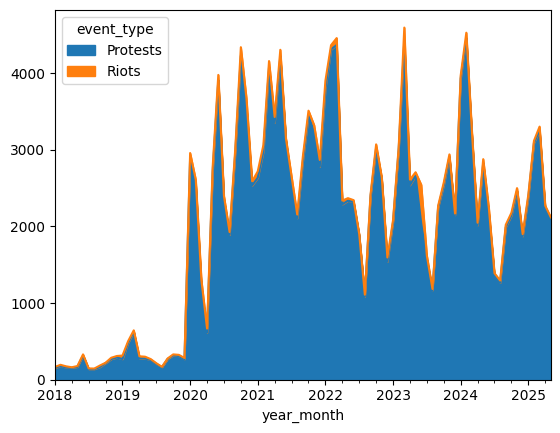

In [30]:
df.groupby(['year_month', 'event_type']).size().unstack().plot.area()

<Axes: xlabel='year_month'>

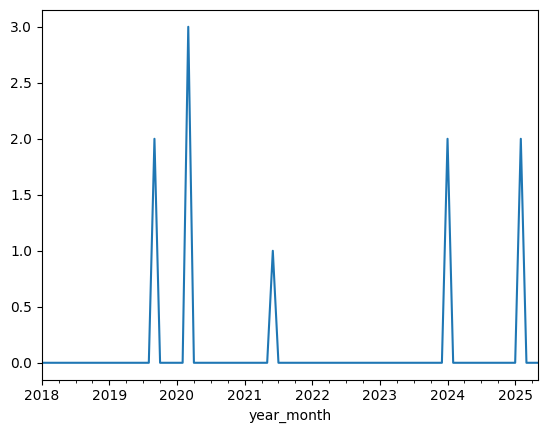

In [31]:
df.groupby('year_month')['fatalities'].sum().plot()

<Axes: xlabel='actor1'>

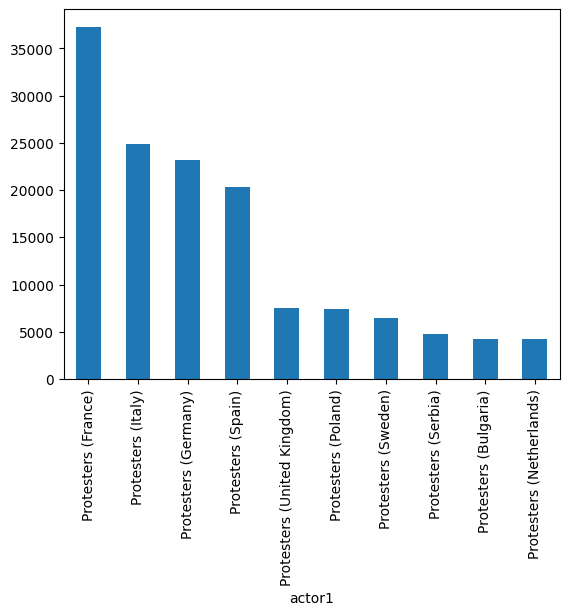

In [32]:
df['actor1'].value_counts().head(10).plot.bar()

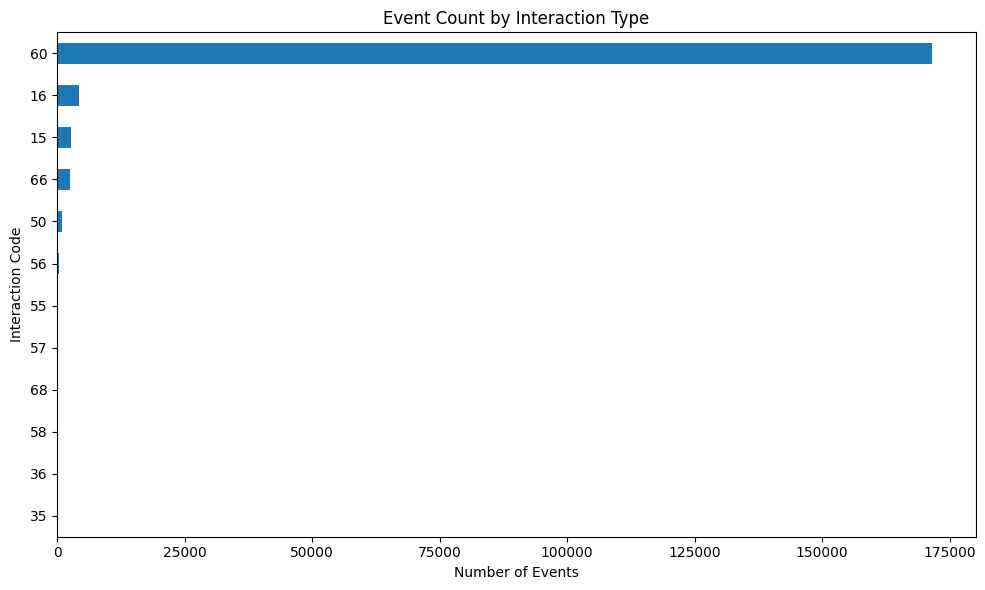

In [33]:
df['interaction'].value_counts().sort_values().plot.barh(figsize=(10,6))
plt.title('Event Count by Interaction Type')
plt.xlabel('Number of Events')
plt.ylabel('Interaction Code')
plt.tight_layout()
plt.show()

C:\Users\semvv\AppData\Local\Temp\ipykernel_19816\1869341266.py:4: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



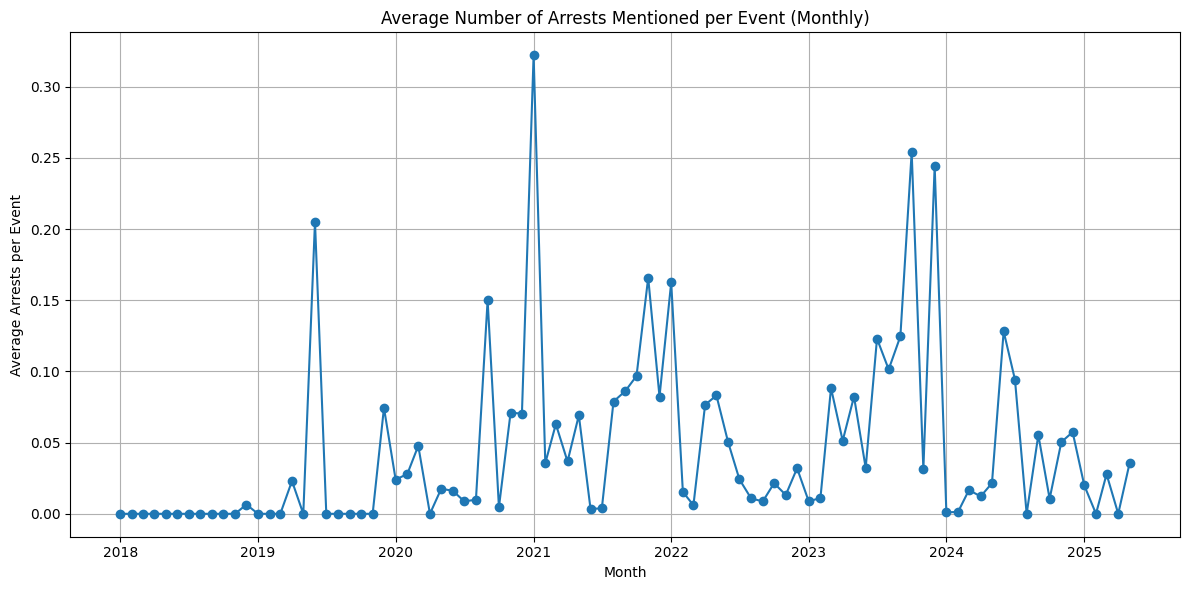

In [34]:
#arrests
df['event_date'] = pd.to_datetime(df['event_date'], format='%d %B %Y')
df['year_month'] = df['event_date'].dt.to_period('M').dt.to_timestamp()
df['mentions_arrest'] = df['notes'].str.contains(r'\barrest(ed|s|ing)?\b', case=False, na=False)
import re

def extract_arrest_count(text):
    if pd.isna(text):
        return 0
    match = re.search(r'(\d+)\s+(people|protesters|individuals)?\s*(were)?\s*arrested', text, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return 0

df['arrest_count'] = df['notes'].apply(extract_arrest_count)
monthly_arrests = df.groupby('year_month')['arrest_count'].mean().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_arrests['year_month'], monthly_arrests['arrest_count'], marker='o')
plt.title('Average Number of Arrests Mentioned per Event (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Arrests per Event')
plt.grid(True)
plt.tight_layout()
plt.show()